# 인천공항 이용자수 분석 및 예측

- https://kosis.kr/search/search.do

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
file_path = "./ref/출입국항구내외국인성별국제이동연간__20250305.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # 우분투일땐 encoding="EUC-KR", 윈도우일땐 utf-8도 가능(?)
ori.tail()

,출입국항별,내외국인별,성별,시점,항목,데이터
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388
183,인천공항,외국인,여자,2023,출국자,130769


In [3]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"] # 이렇게 넣어도 되고 rename으로 넣는법도 있음
# ex1_data.rename(columns={"",""})
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [4]:
# 외국인만 나오게끔 필터제작
filter1 = ex1_data['type1'] == '외국인'
ex2_data = ex1_data[filter1].copy()
ex2_data

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [5]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total') # value값에 total 붙임
ex1_data.head() # 한번만 실행해야함, 그런것들이 있음 그래서 카피를 통해 분류해야함

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717


In [6]:
filter2 = ex2_data['type2'] == '입국자' # 입국자만 뽑기 필터 이용해서
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2'] == '출국자' # 출국자만 뽑기 필터 이용해서
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name="total") # 뒤에값을 앞에값에 업데이트
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total") # 뒤에값을 앞에값에 업데이트

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

['C:\\Windows\\Fonts\\msjhbd.ttc',
 'C:\\Windows\\Fonts\\segoeuiz.ttf',
 'C:\\Windows\\Fonts\\CALISTBI.TTF',
 'C:\\Windows\\Fonts\\verdanab.ttf',
 'C:\\Windows\\Fonts\\ROCK.TTF',
 'C:\\Windows\\Fonts\\HancomUljuCheonjeonriPetroglyph.ttf',
 'C:\\Windows\\Fonts\\VLADIMIR.TTF',
 'C:\\Windows\\Fonts\\GOTHICBI.TTF',
 'C:\\Windows\\Fonts\\CALIFB.TTF',
 'C:\\Windows\\Fonts\\PALSCRI.TTF',
 'C:\\Windows\\Fonts\\CURLZ___.TTF',
 'C:\\Windows\\Fonts\\constanz.ttf',
 'C:\\Windows\\Fonts\\timesbd.ttf',
 'C:\\Windows\\Fonts\\YuGothM.ttc',
 'C:\\Windows\\Fonts\\FRADM.TTF',
 'C:\\Windows\\Fonts\\palai.ttf',
 'C:\\Users\\Admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicBold.otf',
 'C:\\Windows\\Fonts\\Candara.ttf',
 'C:\\Windows\\Fonts\\HANDotum.ttf',
 'C:\\Windows\\Fonts\\BOD_CR.TTF',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\MalangmalangB.ttf',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\TCCM____.TTF',
 'C:\\Windows\\Fonts\\CALISTB.TTF',
 'C:\\Windows\\Fonts\\

In [8]:
from matplotlib import rc

Text(0.2, 0.4, '한글')

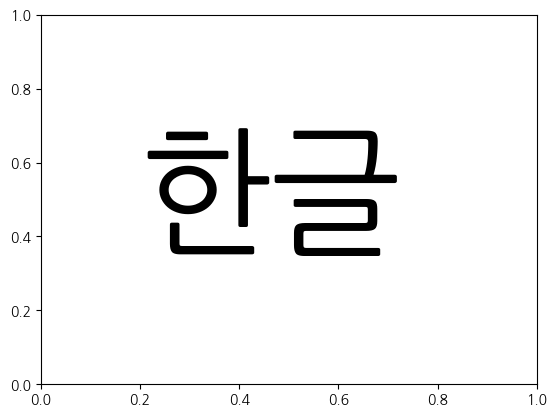

In [9]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

<Axes: title={'center': '2001~2023년 인천공항 입국 외국인 차트'}>

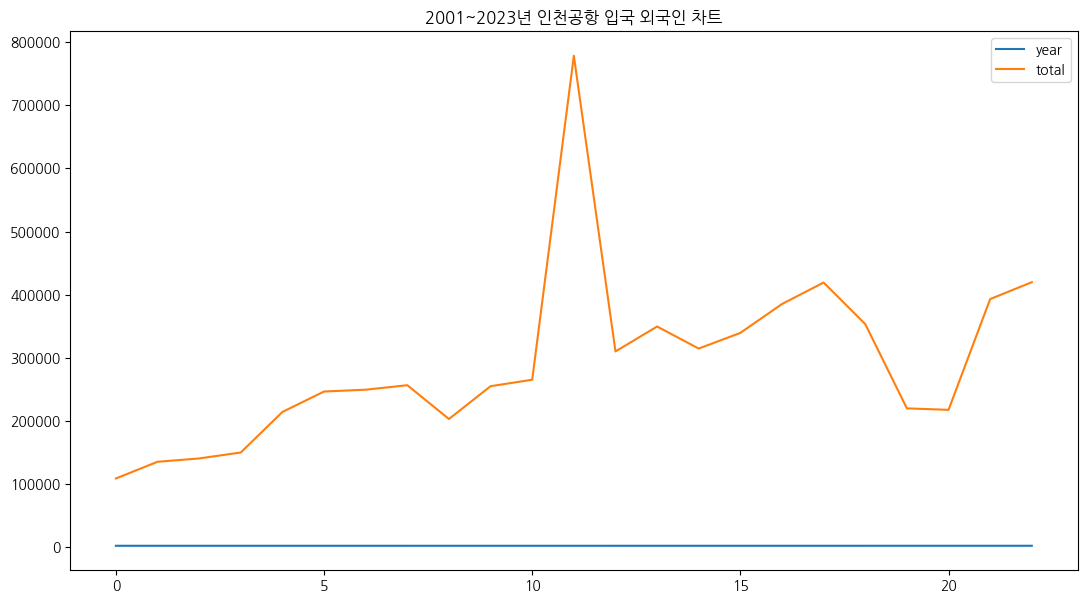

In [10]:
ex2_data.plot(figsize=(13,7), title="2001~2023년 인천공항 입국 외국인 차트")

<Axes: title={'center': '2001~2023년 인천공항 출국 외국인 차트'}>

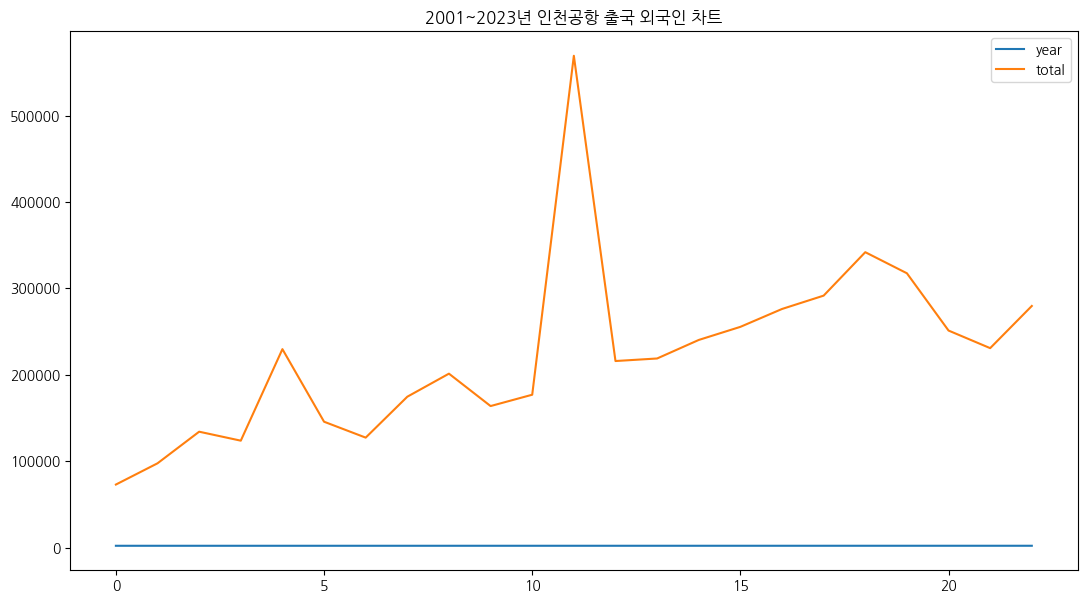

In [11]:
ex3_data.plot(figsize=(13,7), title="2001~2023년 인천공항 출국 외국인 차트")

In [12]:
# !pip install prophet
# !pip install --upgrade plotly
# !pip install --upgrade jupyter ipywidgets

In [13]:
from prophet import Prophet

In [14]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'], format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data.tail()

,ds,y
18,2019-01-01,1198598
19,2020-01-01,1129092
20,2021-01-01,867277
21,2022-01-01,1073387
22,2023-01-01,1124211


In [15]:
m = Prophet()
m.fit(ex4_data)

14:38:35 - cmdstanpy - INFO - Chain [1] start processing
14:38:35 - cmdstanpy - INFO - Chain [1] done processing


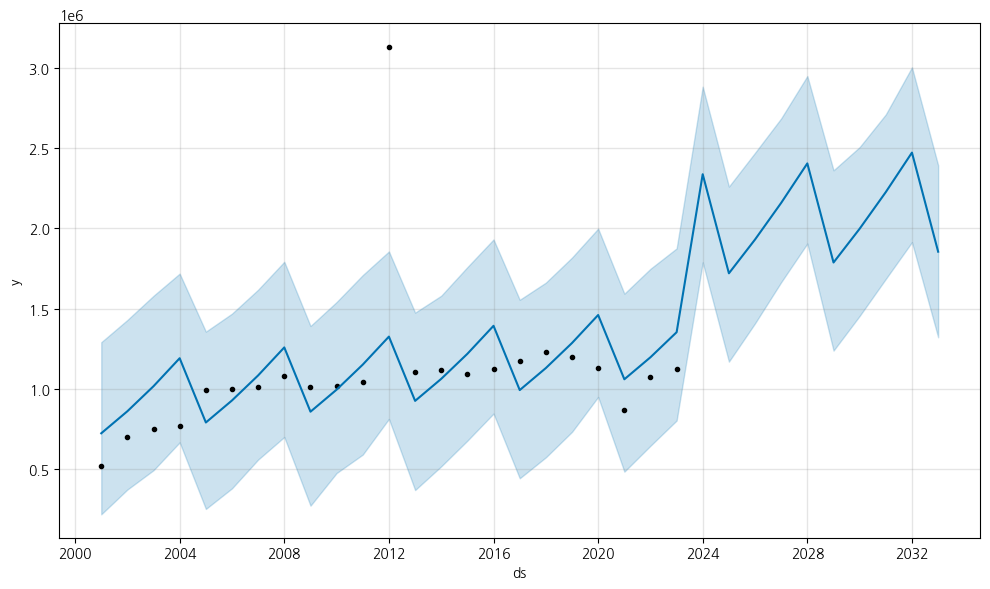

<Figure size 1000x1500 with 0 Axes>

In [16]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/예측.png")
plt.figure(figsize=(10,15))
plt.show()

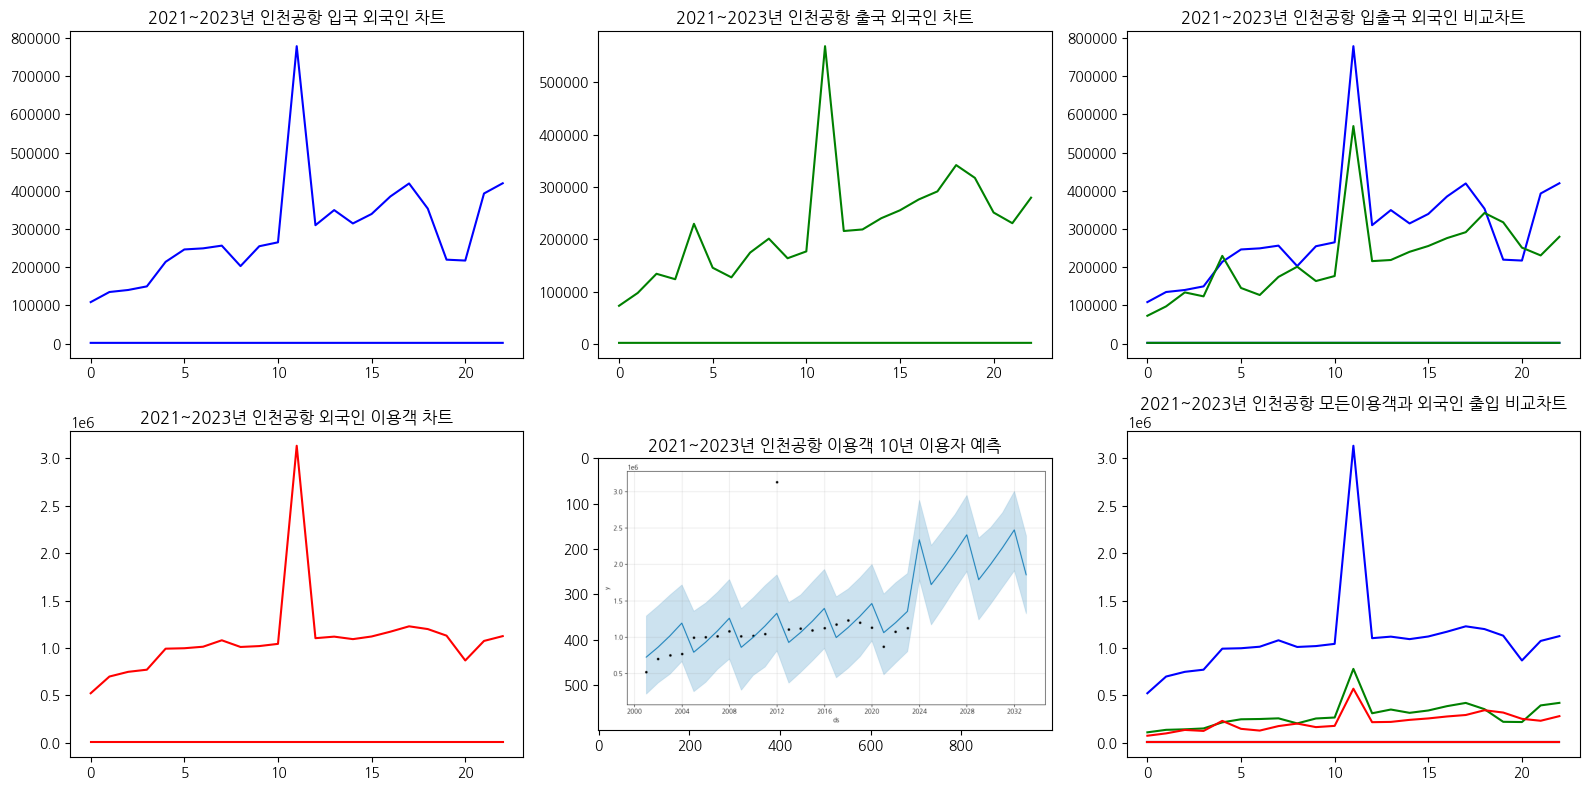

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 이미지 불러오기
img = mpimg.imread("./chart/예측.png")

fig , axs = plt.subplots(2,3,figsize=(16,8)) # 2 x 3 서브플롯 생성

axs[0,0].plot(ex2_data,color="b")
axs[0,1].plot(ex3_data,color="g") 
axs[0,2].plot(ex2_data,color="b") 
axs[0,2].plot(ex3_data,color="g") 
axs[1,0].plot(ex1_data,color="r") 
axs[1,2].plot(ex1_data,color="b") 
axs[1,2].plot(ex2_data,color="g") 
axs[1,2].plot(ex3_data,color="r") 
axs[0,0].set_title("2021~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2021~2023년 인천공항 출국 외국인 차트")
axs[0,2].set_title("2021~2023년 인천공항 입출국 외국인 비교차트")
axs[1,0].set_title("2021~2023년 인천공항 외국인 이용객 차트")
axs[1,1].set_title("2021~2023년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021~2023년 인천공항 모든이용객과 외국인 출입 비교차트")

axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()